# Grad-CAM Inscribed DCA Notebook

This notebook is used to prove that the baseline network is using the DCA to predict the class.

## Imports

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')
import gradcam
import tensorflow as tf
import tensorflow.keras as keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Load in Models

Enter the paths to each model required.

In [2]:
# clean
#base_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\clean\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.29.h5")

# bin
#base_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_binary\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.15.h5")

# real
base_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_realistic\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.30.h5")




# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\clean\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.29.h5
# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_binary\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.15.h5
# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_realistic\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.30.h5

## Load images

In [3]:
# large 1 - ISIC2019_0053821_oth.jpg
# large 2 - ISIC2019_0054304_oth.jpg
# large 3 - ISIC2019_0055495_oth.jpg
# large 4 - ISIC2019_0057233_oth.jpg
# large 5 - ISIC2019_0057493_oth.jpg
# large 6 - ISIC2019_0058606_oth.jpg
# large 7 - ISIC2019_0059418_oth.jpg

# medium 8 - ISIC2019_0053688_oth.jpg
# medium 9 - ISIC2019_0054077_oth.jpg
# medium 10 - ISIC2019_0055313_oth.jpg
# medium 11 - ISIC2019_0056383_oth.jpg
# medium 12 - ISIC2019_0056656_oth.jpg
# medium 13 - ISIC2019_0058686_oth.jpg
# medium 14 - ISIC2019_0059744_oth.jpg

# small 15 - ISIC2019_0000274_oth.jpg
# small 16 - ISIC2019_0027815_oth.jpg
# small 17 - ISIC2019_0029012_oth.jpg
# small 18 - ISIC2019_0029897_oth.jpg
# small 19 - ISIC2019_0032756_oth.jpg
# small 20 - ISIC2019_0053577_oth.jpg
# small 21 - ISIC2019_0053750_oth.jpg

# other 22 - ISIC2019_0000251_oth.jpg
# other 23 - ISIC2019_0000352_oth.jpg
# other 24 - ISIC2019_0054508_oth.jpg
# other 25 - ISIC2019_0056370_oth.jpg
# other 26 - ISIC2019_0064718_oth.jpg
# other 27 - ISIC2019_0066728_oth.jpg
# other 28 - ISIC2019_0069252_oth.jpg
img_name = "ISIC2019_0069252_oth"

# load original image
orig_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\oth\oth\ISIC2019_0069252_oth.jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# load ns image
ns_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\ns\oth\oth\ISIC2019_0069252_oth.png")
ns_image = cv2.cvtColor(ns_image, cv2.COLOR_BGR2RGB)

# load telea image
telea_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\telea\oth\oth\ISIC2019_0069252_oth.png")
telea_image = cv2.cvtColor(telea_image, cv2.COLOR_BGR2RGB)




# finish off clean images
orig_image = orig_image.astype('float32') / 255
orig_image = np.expand_dims(orig_image, axis=0)

ns_image = ns_image.astype('float32') / 255
ns_image = np.expand_dims(ns_image, axis=0)
                        
telea_image = telea_image.astype('float32') / 255
telea_image = np.expand_dims(telea_image, axis=0)




## Generate Predictions

In [4]:
orig_pred = base_model.predict(orig_image)
ns_pred = base_model.predict(ns_image)
telea_pred = base_model.predict(telea_image)


orig_i = np.argmax(orig_pred[0])
ns_i = np.argmax(ns_pred[0])
telea_i = np.argmax(telea_pred[0])

1/1 [==============================] - 0s 43ms/step


## Create Grad-CAM heatmaps

In [5]:
orig_cam = gradcam.GradCAM(base_model, orig_i, 'conv_7b_ac')
ns_cam = gradcam.GradCAM(base_model, ns_i, 'conv_7b_ac')
telea_cam = gradcam.GradCAM(base_model, ns_i, 'conv_7b_ac')

orig_heatmap = orig_cam.compute_heatmap(orig_image)
ns_heatmap = ns_cam.compute_heatmap(ns_image)
telea_heatmap = telea_cam.compute_heatmap(telea_image)


In [6]:
# load original image
orig_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\oth\oth\ISIC2019_0069252_oth.jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# load ns image
ns_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\ns\oth\oth\ISIC2019_0069252_oth.png")
ns_image = cv2.cvtColor(ns_image, cv2.COLOR_BGR2RGB)

# load telea image
telea_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\telea\oth\oth\ISIC2019_0069252_oth.png")
telea_image = cv2.cvtColor(telea_image, cv2.COLOR_BGR2RGB)

## Layer images and heatmaps

In [7]:
(orig_heatmap, orig_output) = orig_cam.overlay_heatmap(orig_heatmap, orig_image, alpha=0.5)
(ns_heatmap, ns_output) = ns_cam.overlay_heatmap(ns_heatmap, ns_image, alpha=0.5)
(telea_heatmap, telea_output) = telea_cam.overlay_heatmap(telea_heatmap, telea_image, alpha=0.5)


In [8]:
cv2.rectangle(orig_image, (0,0), (90,20), (0,0,0), -1);
cv2.putText(orig_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);

cv2.rectangle(ns_image, (0,0), (90,20), (0,0,0), -1);
cv2.putText(ns_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);

cv2.rectangle(telea_image, (0,0), (90,20), (0,0,0), -1);
cv2.putText(telea_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);


cv2.rectangle(orig_output, (0,0), (100,20), (0,0,0), -1);
cv2.putText(orig_output, "Pred: mel" if orig_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);

cv2.rectangle(ns_output, (0,0), (100,20), (0,0,0), -1);
cv2.putText(ns_output, "Pred: mel" if ns_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);

cv2.rectangle(telea_output, (0,0), (100,20), (0,0,0), -1);
cv2.putText(telea_output, "Pred: mel" if ns_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);


## Plot images

<function matplotlib.pyplot.imsave(fname, arr, **kwargs)>

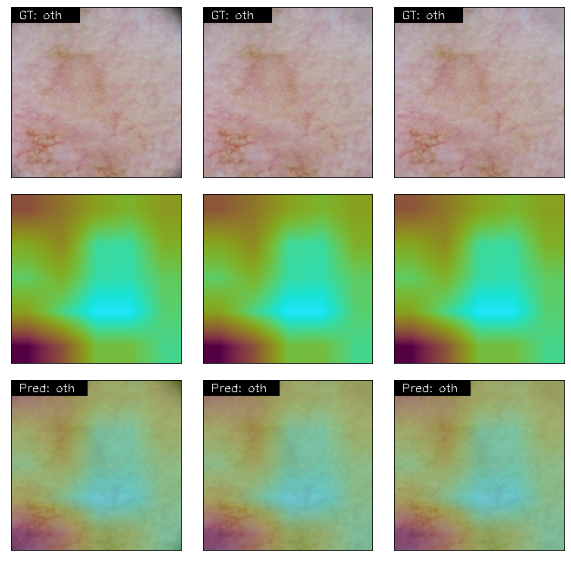

In [9]:
fig, axes = plt.subplots(3, 3, figsize = (10,10));

axes[0][0].imshow(orig_image);
axes[1][0].imshow(orig_heatmap);
axes[2][0].imshow(orig_output);

axes[0][1].imshow(ns_image);
axes[1][1].imshow(ns_heatmap);
axes[2][1].imshow(ns_output);

axes[0][2].imshow(telea_image);
axes[1][2].imshow(telea_heatmap);
axes[2][2].imshow(telea_output);

for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    
plt.subplots_adjust(wspace=0.1, hspace = 0.1)

plt.imsave

In [10]:
print(orig_i, ns_i)

1 1


In [12]:
#clean
#fig.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\clean\oth\gradcam_28_gt_oth_pred_oth.png')

#bin
#fig.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\dca_binary\oth\gradcam_28_gt_oth_pred_oth.png')

#real
#fig.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\dca_realistic\oth\gradcam_28_gt_oth_pred_oth.png')